In [1]:
# import libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.rcParams.update({'font.size': 22})

In [2]:
cookie_cats = pd.read_csv("/Users/Honors/Downloads/cookie_cats.csv")

In [3]:
cookie_cats.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [4]:
cookie_cats

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


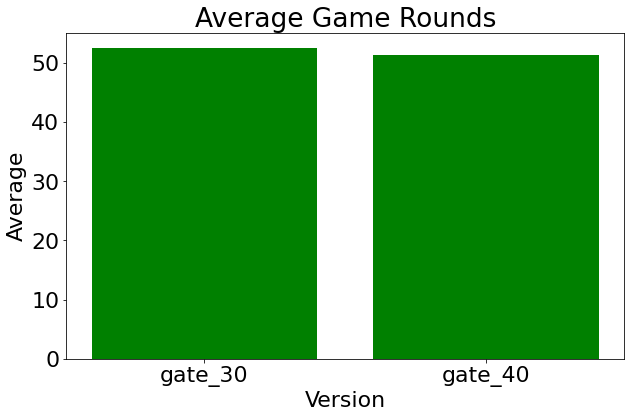

In [3]:
# Find the average number of game rounds for each version, and the standard deviation and the number of values

version_group = cookie_cats.groupby("version").agg(["mean", "std", "count"])["sum_gamerounds"]
plt.figure(figsize=(10, 6))
plt.bar(cookie_cats["version"].unique(), version_group["mean"], color = "green")
plt.title("Average Game Rounds")
plt.ylabel("Average")
plt.xlabel("Version")
plt.show()

In [6]:
# Calculate relevant statistics for the two versions

# Calculate mean and standard deviation and count for the level 30 gate version 

mean_30 = version_group["mean"]["gate_30"]
std_30 = version_group["std"]["gate_30"]
count_30 = version_group["count"]["gate_30"]

# Calculate mean and standard deviation and count for the level 40 gate version 

mean_40 = version_group["mean"]["gate_40"]
std_40 = version_group["std"]["gate_40"]
count_40 = version_group["count"]["gate_40"]

# Calculate standard errors

se_30 = std_30/np.sqrt(count_30)
se_40 = std_40/np.sqrt(count_40)

In [7]:
# Conduct the A/B test for game rounds

version_30 = cookie_cats[cookie_cats["version"] == "gate_30"]["sum_gamerounds"]
version_40 = cookie_cats[cookie_cats["version"] == "gate_40"]["sum_gamerounds"]

stats.ttest_ind(version_30, version_40)

Ttest_indResult(statistic=0.8910426211362967, pvalue=0.37290868247405207)

In [8]:
# Calculate 95% confidence interval for the difference

# Calculate degrees of freedom

degrees_freedom = count_30 + count_40 - 2

# Calculate critical t score

t_critical = stats.t.ppf(0.975, degrees_freedom)

# Calculate the standard error of the difference

difference = mean_30 - mean_40

# Calculate the standard error of the difference

standard_error = np.sqrt(se_30 ** 2 + se_40 ** 2)

# Calculate lower and upper bounds

lower_bound = difference - t_critical * standard_error
upper_bound = difference + t_critical * standard_error
print(difference)
print(lower_bound, upper_bound)

1.157488453953249
-1.4047096689986396 3.7196865769051377


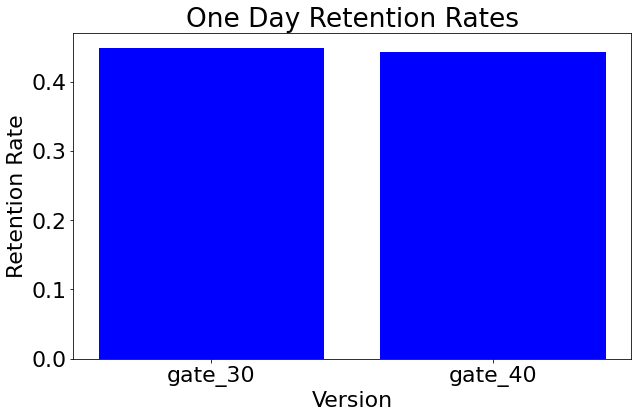

In [9]:
# Create a bar graph for each version's one-day retention rate

version_group_retention1 = cookie_cats.groupby("version").agg(["count", "sum"])["retention_1"]
version_group_retention1["proportion"] = version_group_retention1["sum"]/version_group_retention1["count"]

plt.figure(figsize=(10, 6))
plt.bar(cookie_cats["version"].unique(), version_group_retention1["proportion"], color = "blue")
plt.title("One Day Retention Rates")
plt.ylabel("Retention Rate")
plt.xlabel("Version")
plt.show()

In [10]:
# Conduct the proportion A/B test

retention_count_30 = version_group_retention1["sum"]["gate_30"]
retention_count_40 = version_group_retention1["sum"]["gate_40"]

sm.stats.proportions_ztest([retention_count_30, retention_count_40],[count_30, count_40])

(1.7840862247974725, 0.07440965529691913)

In [15]:
# Calculate the 95% confidence interval

z_score = sm.stats.proportions_ztest([retention_count_30, retention_count_40],[count_30, count_40])[0]
z_critical = stats.norm.ppf(0.975)

# Calculate standard error

retention1_proportion_30 = version_group_retention1["proportion"]["gate_30"]
retention1_proportion_40 = version_group_retention1["proportion"]["gate_40"]

se_retention1 = np.sqrt((retention1_proportion_30 * (1-retention1_proportion_30))/count_30 + (retention1_proportion_40 * (1-retention1_proportion_40))/count_40)

# Calculate difference

retention1_difference = retention1_proportion_30 - retention1_proportion_40

# Calculate lower and upper bounds

lower_bound = retention1_difference - z_critical * se_retention1
upper_bound = retention1_difference + z_critical * se_retention1

print(retention1_difference)
print(lower_bound, upper_bound)

0.005905169787341458
-0.0005820998747623016 0.012392439449445217


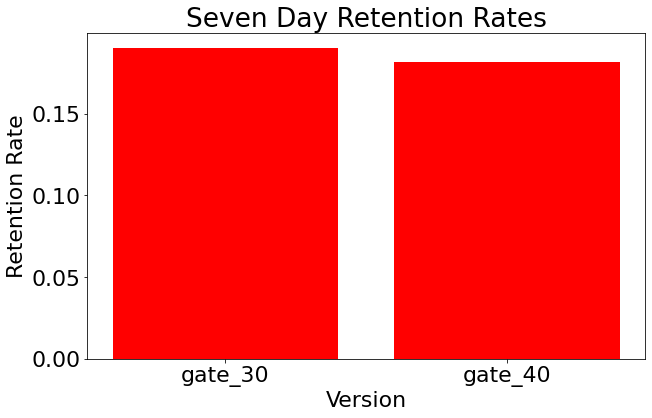

In [18]:
# Create a bar graph for each version's seven-day retention rate

version_group_retention7 = cookie_cats.groupby("version").agg(["count", "sum"])["retention_7"]
version_group_retention7["proportion"] = version_group_retention7["sum"]/version_group_retention7["count"]

plt.figure(figsize=(10, 6))
plt.bar(cookie_cats["version"].unique(), version_group_retention7["proportion"], color = "red")
plt.title("Seven Day Retention Rates")
plt.ylabel("Retention Rate")
plt.xlabel("Version")
plt.show()

In [19]:
# Conduct the proportion A/B test

retention7_count_30 = version_group_retention7["sum"]["gate_30"]
retention7_count_40 = version_group_retention7["sum"]["gate_40"]

sm.stats.proportions_ztest([retention7_count_30, retention7_count_40],[count_30, count_40])

(3.164358912748191, 0.001554249975614329)

In [21]:
# Calculate the 95% confidence interval

z_score = sm.stats.proportions_ztest([retention7_count_30, retention7_count_40],[count_30, count_40])[0]
z_critical = stats.norm.ppf(0.975)

# Calculate standard error

retention7_proportion_30 = version_group_retention7["proportion"]["gate_30"]
retention7_proportion_40 = version_group_retention7["proportion"]["gate_40"]

se_retention7 = np.sqrt((retention7_proportion_30 * (1-retention7_proportion_30))/count_30 + (retention7_proportion_40 * (1-retention7_proportion_40))/count_40)

# Calculate difference

retention7_difference = retention7_proportion_30 - retention7_proportion_40

# Calculate lower and upper bounds

lower_bound = retention1_difference - z_critical * se_retention7
upper_bound = retention1_difference + z_critical * se_retention7

print(retention7_difference)
print(lower_bound, upper_bound)

0.008201298315205913
0.0031210442115262808 0.013281552418885545
